The following code block imports some libraries we will start with.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We will be working with a sample of the Iowa Liquor Sales data. The following code block reads the data, converts the date column from a string to a datetime, and prints the first 5 rows.

In [2]:
data = pd.read_csv('ils.csv')
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,vendor,category,liters_sold
0,2019-03-01,AMERICAN VINTAGE BEVERAGE,COCKTAILS /RTD,21.000
1,2019-03-01,BACARDI USA INC,100% AGAVE TEQUILA,7.500
2,2019-03-01,BACARDI USA INC,AGED DARK RUM,0.750
3,2019-03-01,BACARDI USA INC,COCKTAILS /RTD,26.250
4,2019-03-01,BACARDI USA INC,FLAVORED RUM,110.875


The following code block creates a `DataFrame` named `daily_sales` that aggregates the values in the `liters_sold` column, across all vendors and categories, by date. 

In [3]:
daily_sales = data.groupby(
    'date'
).agg(
    total_liters_sold=('liters_sold', 'sum')
)

The following code block plots the values in the `daily_sales` object.

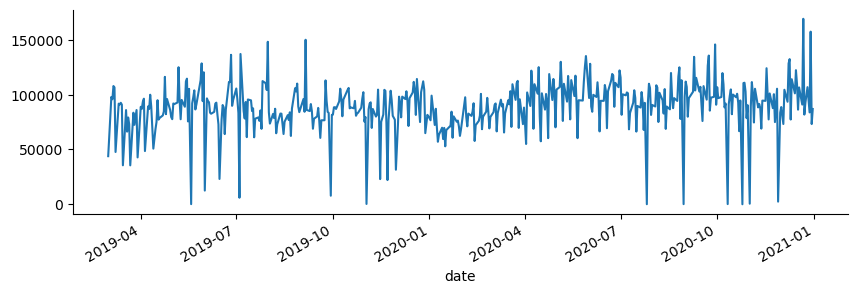

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

daily_sales.plot(
    y='total_liters_sold',
    ax=ax,
    legend=False,
)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

First, we used the data to answer the question:
> "**Was there a statistically significant increase in total liters sold after the start of the COVID shutdown (3/15/2020)? Provide a visualization that supports your claim.**"

We will need to filter the data for pre- and post-shutdown, so the following code block creates a column that determines whether or not a date is before the specified date or not.

In [5]:
daily_sales = daily_sales.reset_index()
daily_sales['post_shutdown'] = (daily_sales['date'] >= '3/15/2020').astype(int)

The following code block creates a period column, which is just a consecutive integer for each date. We will use this to generate regression plots. The first five rows of the modified `daily_sales` object is shown.

In [6]:
daily_sales = daily_sales.reset_index()
daily_sales = daily_sales.rename(columns={'index': 'period'})
daily_sales.head()

,period,date,total_liters_sold,post_shutdown
0,0,2019-03-01,43857.450,0
1,1,2019-03-04,97907.775,0
2,2,2019-03-05,95761.000,0
3,3,2019-03-06,107829.280,0
4,4,2019-03-07,106568.675,0


The following code block generates a figure that fits linear regression models for both the pre- and post-shutdown times. 

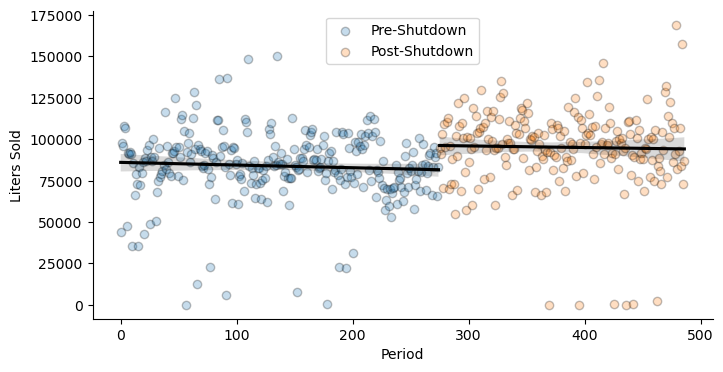

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.regplot(
    data=daily_sales[daily_sales['post_shutdown']==0],
    x='period',
    y='total_liters_sold',
    ax=ax,
    label='Pre-Shutdown',
    line_kws={'color': 'k'},
    scatter_kws={'alpha':0.25, 'edgecolor': 'k'},
)

sns.regplot(
    data=daily_sales[daily_sales['post_shutdown']==1],
    x='period',
    y='total_liters_sold',
    ax=ax,
    label='Post-Shutdown',
    line_kws={'color': 'k'},
    scatter_kws={'alpha':0.25, 'edgecolor': 'k'},
)


ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_xlabel('Period')
ax.set_ylabel('Liters Sold')

plt.show()

The following code block generates a figure that plots 95% confidence intervals for the mean total liters sold each day for the pre- and post-shutdown times. The intervals do not overlap, thus, we can say that there was a statistically significant increase in the sales post-shutdown.

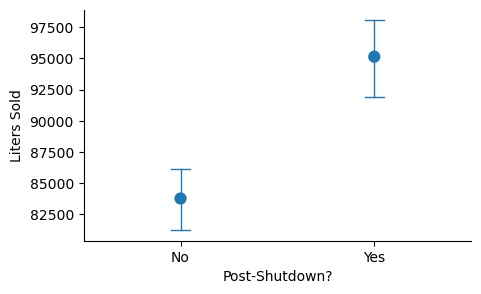

In [10]:
fig, ax = plt.subplots(1,1, figsize =(5, 3))

sns.pointplot(
    data=daily_sales,
    x='post_shutdown',
    y='total_liters_sold',
    join=False,
    errwidth=1.0,
    capsize=0.1,
)
ax.spines[['right','top']].set_visible(False)
ax.set_xlabel('Post-Shutdown?')
ax.set_ylabel('Liters Sold')
ax.set_xticklabels(['No', 'Yes'])

plt.show()